In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
input_path="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Comments\\FinalCsvFiles\\Comments_2017_2020.csv"

In [2]:
data=pd.read_csv(input_path,names=["RowId","CreateDate","PostId","Score","UserId"])
data.head()

,RowId,CreateDate,PostId,Score,UserId
0,70028700,2017-01-01T00:00:36.010,41412408,0,7123245
1,70028701,2017-01-01T00:00:24.143,41305580,0,218196
2,70028706,2017-01-01T00:01:42.053,41412354,0,743464
3,70028707,2017-01-01T00:01:51.007,11215592,2,1244126
4,70028708,2017-01-01T00:01:56.537,41305580,0,218196


In [3]:
len(data)

29857733

In [4]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [5]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    
    result = adfuller(timeseries)
    p_value=result[1]
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print(f'Result: The series is {"not " if p_value > 0.05 else ""}stationary')

In [6]:
import scipy.stats as stats
def is_normal_shapiro(data):
    stat, p = stats.shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [7]:
def do_ttest(df1,df2):
    stat, p = stats.ttest_ind(df1['count_delta'], df2['count_delta'],equal_var=False)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [8]:
data["CreateDate"] = pd.to_datetime(data["CreateDate"])
data.head()

,RowId,CreateDate,PostId,Score,UserId
0,70028700,2017-01-01 00:00:36.010,41412408,0,7123245
1,70028701,2017-01-01 00:00:24.143,41305580,0,218196
2,70028706,2017-01-01 00:01:42.053,41412354,0,743464
3,70028707,2017-01-01 00:01:51.007,11215592,2,1244126
4,70028708,2017-01-01 00:01:56.537,41305580,0,218196


In [9]:
data['day_date'] = data['CreateDate'].dt.date

In [10]:
creation_daily=pd.DataFrame(data[["RowId", "day_date"]])
creation_daily.head()

,RowId,day_date
0,70028700,2017-01-01
1,70028701,2017-01-01
2,70028706,2017-01-01
3,70028707,2017-01-01
4,70028708,2017-01-01


In [11]:
creation_daily_grp=creation_daily.groupby(by=['day_date']).size().reset_index(name='counts')
creation_daily_grp.head()

,day_date,counts
0,2017-01-01,10644
1,2017-01-02,20026
2,2017-01-03,26630
3,2017-01-04,28323
4,2017-01-05,29758


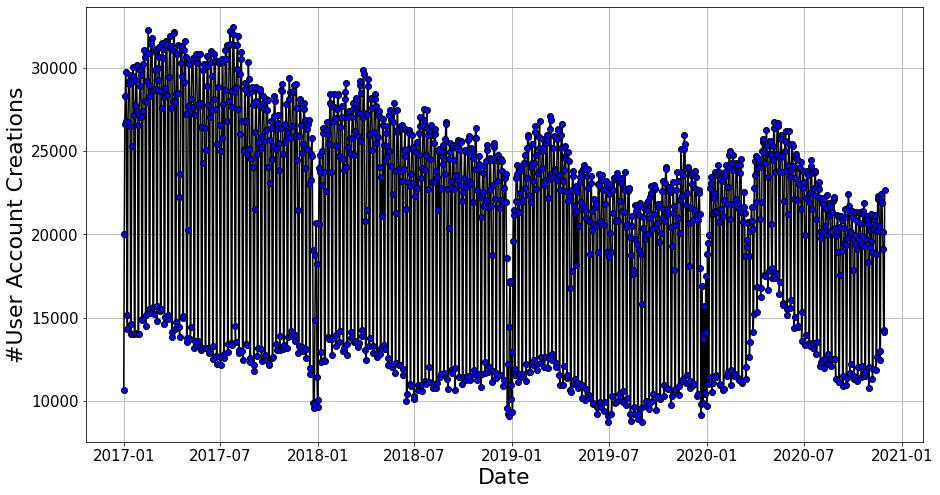

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(creation_daily_grp['day_date'],creation_daily_grp['counts'],'-o',color='black',markerfacecolor='b')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('#User Account Creations',fontsize=22)
plt.xlabel('Date',fontsize=22)
plt.grid()


In [13]:
kpss_test(creation_daily_grp['counts'])

KPSS Statistic: 3.4230492976261133
p-value: 0.01
num lags: 24
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1881: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [14]:
adf_test(creation_daily_grp['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -2.786617
p-value: 0.060211
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Result: The series is not stationary


In [15]:
creation_daily_grp['count_delta'] = creation_daily_grp['counts'].diff()
creation_daily_grp.head()

,day_date,counts,count_delta
0,2017-01-01,10644,NaN
1,2017-01-02,20026,9382.0
2,2017-01-03,26630,6604.0
3,2017-01-04,28323,1693.0
4,2017-01-05,29758,1435.0


In [16]:
creation_daily_grp_delta_notna = creation_daily_grp[creation_daily_grp['count_delta'].notna()]
len(creation_daily_grp_delta_notna)

1429

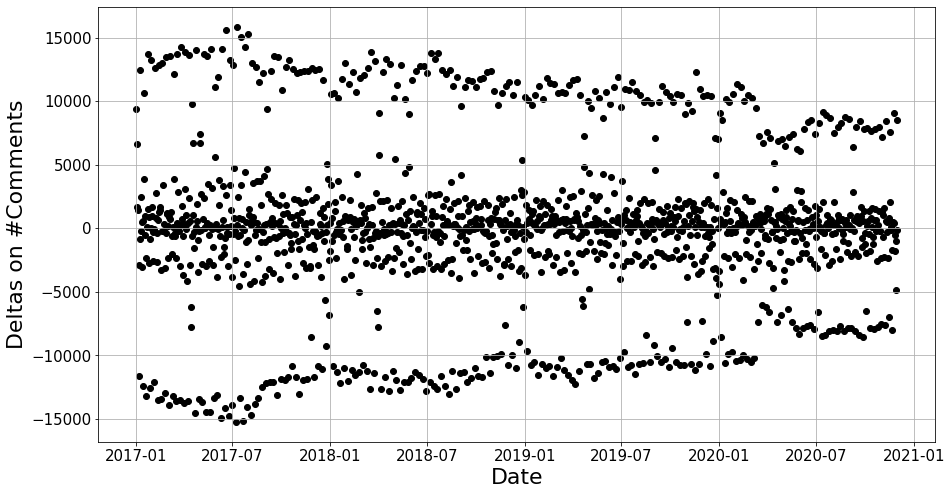

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(creation_daily_grp_delta_notna['day_date'],creation_daily_grp_delta_notna['count_delta'],color="black")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Deltas on #Comments',fontsize=22)
plt.xlabel('Date',fontsize=22)
plt.grid()


In [18]:
is_normal_shapiro(creation_daily_grp_delta_notna['count_delta'])

Statistics=0.919, p=0.000
Sample does not look Gaussian (reject H0)


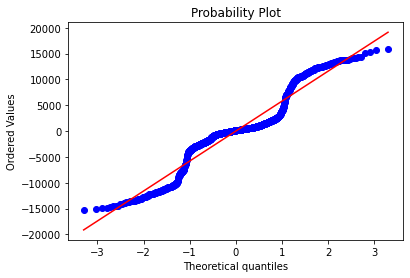

In [19]:
import pylab 
stats.probplot(creation_daily_grp_delta_notna['count_delta'], dist="norm", plot=pylab)
pylab.show()

(array([ 46., 106.,  50.,  88., 483., 419.,  35.,  53., 112.,  37.]),
 array([-15248. , -12137.7,  -9027.4,  -5917.1,  -2806.8,    303.5,
          3413.8,   6524.1,   9634.4,  12744.7,  15855. ]),
 <BarContainer object of 10 artists>)

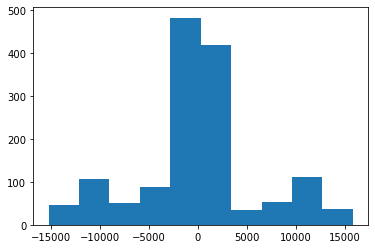

In [20]:
plt.hist(creation_daily_grp_delta_notna['count_delta'])

In [21]:
creation_daily_grp_delta_notna['day_date']=pd.to_datetime(creation_daily_grp_delta_notna["day_date"])
creation_daily_grp_delta_notna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 1 to 1429
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day_date     1429 non-null   datetime64[ns]
 1   counts       1429 non-null   int64         
 2   count_delta  1429 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 44.7 KB


<ipython-input-21-e6560584eb25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creation_daily_grp_delta_notna['day_date']=pd.to_datetime(creation_daily_grp_delta_notna["day_date"])


In [22]:
creation_daily_grp_delta_notna_17_19=creation_daily_grp_delta_notna[creation_daily_grp_delta_notna['day_date']<'2020-01-01']
len(creation_daily_grp_delta_notna_17_19)

1094

In [23]:
creation_daily_grp_delta_notna_20=creation_daily_grp_delta_notna[creation_daily_grp_delta_notna['day_date']>='2020-01-01']
len(creation_daily_grp_delta_notna_20)

335

In [24]:
def do_meanwhit(df1,df2):
    stat, p = stats.mannwhitneyu(df1['count_delta'], df2['count_delta'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [25]:
do_meanwhit(creation_daily_grp_delta_notna_17_19,creation_daily_grp_delta_notna_20)

Statistics=182877.500, p=0.478
Same distribution (fail to reject H0)


In [26]:
creation_daily_grp_delta_notna_17=creation_daily_grp_delta_notna[(creation_daily_grp_delta_notna['day_date']>='2017-01-01')
                                                                & (creation_daily_grp_delta_notna['day_date']<'2018-01-01')]
len(creation_daily_grp_delta_notna_17) ##does not have fisrt day, we filtered it

364

In [27]:
creation_daily_grp_delta_notna_18=creation_daily_grp_delta_notna[(creation_daily_grp_delta_notna['day_date']>='2018-01-01')
                                                                & (creation_daily_grp_delta_notna['day_date']<'2019-01-01')]
len(creation_daily_grp_delta_notna_18)

365

In [28]:
creation_daily_grp_delta_notna_19=creation_daily_grp_delta_notna[(creation_daily_grp_delta_notna['day_date']>='2019-01-01')
                                                                & (creation_daily_grp_delta_notna['day_date']<'2020-01-01')]
len(creation_daily_grp_delta_notna_19)

365

In [29]:
do_meanwhit(creation_daily_grp_delta_notna_17,creation_daily_grp_delta_notna_20)

Statistics=60606.000, p=0.446
Same distribution (fail to reject H0)


In [30]:
do_meanwhit(creation_daily_grp_delta_notna_18,creation_daily_grp_delta_notna_20)

Statistics=60632.000, p=0.425
Same distribution (fail to reject H0)


In [31]:
do_meanwhit(creation_daily_grp_delta_notna_19,creation_daily_grp_delta_notna_20)

Statistics=60635.500, p=0.426
Same distribution (fail to reject H0)


In [32]:
#df should be monthly yearly data
def to_bimonthly(df):
    d={'counts':'sum'}
    bi_counts=df.groupby(df.index  // 2).agg(d)
    monthYear=df['CreateYearMonth']
#     monthYear['months']=monthYear[::2]
    bi_months = pd.DataFrame({"months":monthYear[::2]}) 
    bi_months.index = np.arange(1, len(bi_months) + 1)
    bi_counts.index=np.arange(1, len(bi_counts) + 1)
    result = pd.concat([bi_months, bi_counts], axis=1)
    result.drop(result.tail(1).index,inplace=True) # drop last row cause we do not have dec data and so it only includes nov and becomes small
    return result

In [33]:
def getYearlyMonthlyCreation(data):
    data["CreateDate"] = pd.to_datetime(data["CreateDate"])
    print(data.head())
    data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)
    print(data.head())
    data["CreateMonth"]=data['CreateDate'].map(lambda x: x.month)
    print(data.head())
    data["CreateYearMonth"]=data["CreateYear"].astype(str) +"-"+ data["CreateMonth"].astype(str)
    print(data.head())
    data['CreateYearMonth'] = pd.to_datetime(data['CreateYearMonth'])
    print(data.head())
    creation_yearly_monthly = pd.DataFrame(data[["RowId", "CreateYearMonth"]])
    print(creation_yearly_monthly.head())
    yearly_monthly_grp=creation_yearly_monthly.groupby(by=['CreateYearMonth']).size().reset_index(name='counts')
    yearly_monthly_grp.head()
    return yearly_monthly_grp

In [34]:
yearly_monthly_comments=getYearlyMonthlyCreation(data)

      RowId              CreateDate    PostId  Score   UserId    day_date
0  70028700 2017-01-01 00:00:36.010  41412408      0  7123245  2017-01-01
1  70028701 2017-01-01 00:00:24.143  41305580      0   218196  2017-01-01
2  70028706 2017-01-01 00:01:42.053  41412354      0   743464  2017-01-01
3  70028707 2017-01-01 00:01:51.007  11215592      2  1244126  2017-01-01
4  70028708 2017-01-01 00:01:56.537  41305580      0   218196  2017-01-01
      RowId              CreateDate    PostId  Score   UserId    day_date  \
0  70028700 2017-01-01 00:00:36.010  41412408      0  7123245  2017-01-01   
1  70028701 2017-01-01 00:00:24.143  41305580      0   218196  2017-01-01   
2  70028706 2017-01-01 00:01:42.053  41412354      0   743464  2017-01-01   
3  70028707 2017-01-01 00:01:51.007  11215592      2  1244126  2017-01-01   
4  70028708 2017-01-01 00:01:56.537  41305580      0   218196  2017-01-01   

   CreateYear  
0        2017  
1        2017  
2        2017  
3        2017  
4        2017

In [35]:
months_xticks=['Jan 2017','','','Apr','','','Jul','','','Oct','','','Jan 2018','','','Apr','','','Jul','','','Oct','','','Jan 2019','','','Apr','','','Jul','','','Oct','','','Jan 2020','','','Apr','','','Jul','','','Oct','']

Text(0, 0.5, 'Comment Creations')

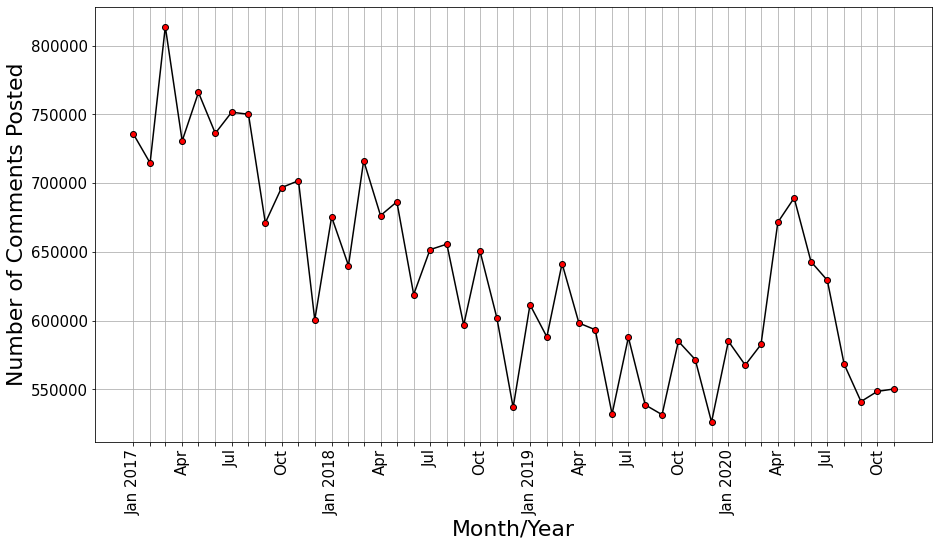

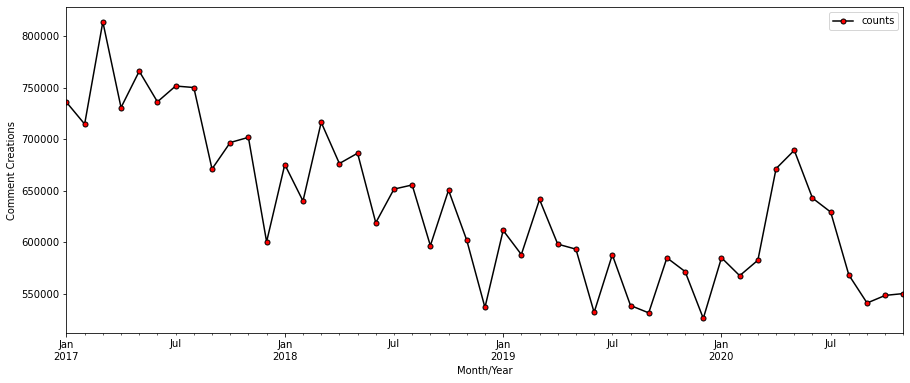

In [36]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(yearly_monthly_comments['CreateYearMonth'],yearly_monthly_comments['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(yearly_monthly_comments['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Number of Comments Posted',fontsize=22)
plt.grid()
plt.xlabel('Month/Year',fontsize=22)
plt.savefig('figs/SO_CommentCreationYearltMonthly.pdf',bbox_inches='tight')
# plt.grid()

yearly_monthly_comments.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
                         marker='.', markerfacecolor='r',color='black',markersize=10)
# plt.rcParams.update({'font.size': 12})
plt.xlabel('Month/Year')
plt.ylabel('Comment Creations')

In [37]:
bimonthly_yearly=to_bimonthly(yearly_monthly_comments)
bimonthly_yearly

,months,counts
1,2017-01-01,1450631
2,2017-03-01,1544675
3,2017-05-01,1502328
4,2017-07-01,1501838
5,2017-09-01,1367917
6,2017-11-01,1302294
7,2018-01-01,1315491
8,2018-03-01,1392861
9,2018-05-01,1305386
10,2018-07-01,1307223


In [38]:
#remove nov/dec 2020 cause we do not have dec data
bi_ticks=['Jan/Feb 2017','March/April 2017','May/June 2017','July/Aug 2017','Sept/Oct 2017','Nov/Dec 2017','Jan/Feb 2018','March/April 2018','May/June 2018','July/Aug 2018','Sept/Oct 2018','Nov/Dec 2018',
    'Jan/Feb 2019','March/April 2019','May/June 2019','July/Aug 2019','Sept/Oct 2019','Nov/Dec 2019','Jan/Feb 2020','March/April 2020','May/June 2020','July/Aug 2020','Sept/Oct 2020']

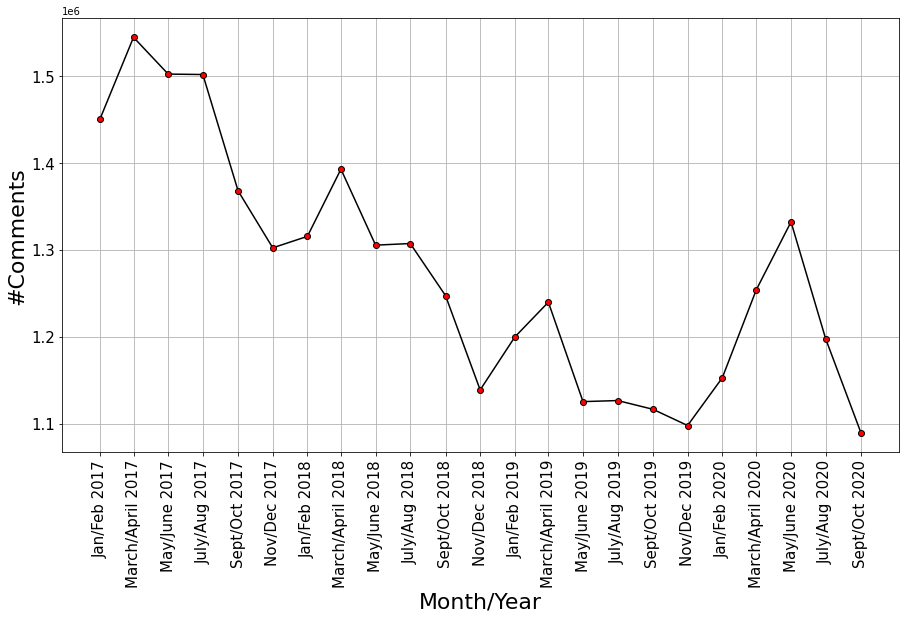

In [60]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly['months'],bimonthly_yearly['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_yearly['months'], bi_ticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Comments',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()
plt.savefig('figs/SO_CommentsBiMonthly.pdf',bbox_inches='tight')


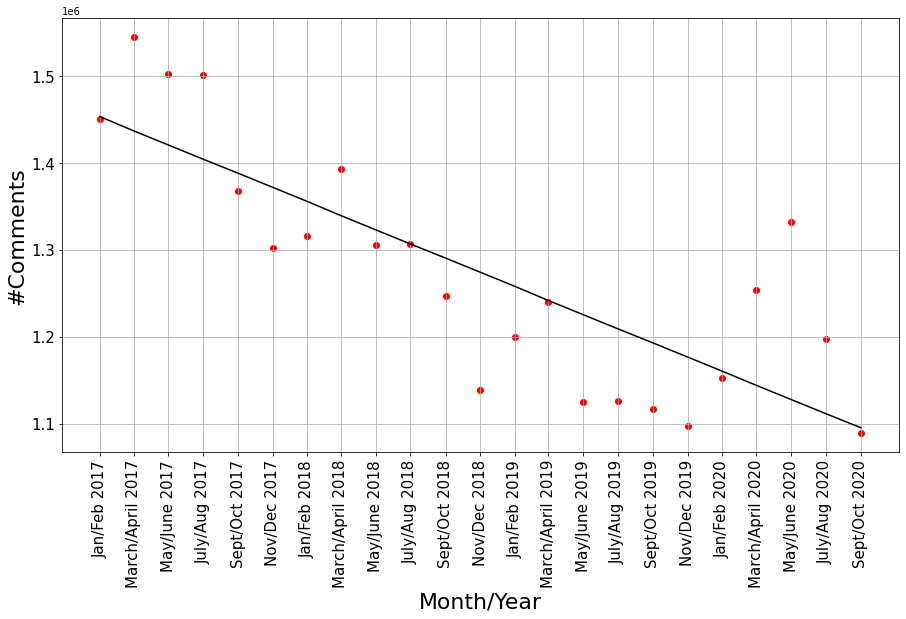

In [61]:
from sklearn import linear_model
x=np.array(pd.to_datetime(bimonthly_yearly['months'].index.values, format='%Y-%m-%d'), dtype=float)
x=x.reshape(-1, 1)
y=np.array(bimonthly_yearly['counts'], dtype=float)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)
predictions = lm.predict(x)

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly['months'], predictions, 'k-')
plt.scatter(bimonthly_yearly['months'],bimonthly_yearly['counts'],color='red')
plt.xticks(bimonthly_yearly['months'], bi_ticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Comments',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()
plt.savefig('figs/SO_CommentsBiMonthlyRegressline.pdf',bbox_inches='tight')


In [57]:
kpss_test(bimonthly_yearly['counts'])

KPSS Statistic: 0.3473210055223476
p-value: 0.09986163555071223
num lags: 9
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [58]:
adf_test(bimonthly_yearly['counts'])

Results of Dickey-Fuller Test:
ADF Statistic: -3.265111
p-value: 0.016512
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702
Result: The series is stationary


In [43]:
bimonthly_yearly['count_delta'] = bimonthly_yearly['counts'].diff()
bimonthly_yearly

,months,counts,count_delta
1,2017-01-01,1450631,NaN
2,2017-03-01,1544675,94044.0
3,2017-05-01,1502328,-42347.0
4,2017-07-01,1501838,-490.0
5,2017-09-01,1367917,-133921.0
6,2017-11-01,1302294,-65623.0
7,2018-01-01,1315491,13197.0
8,2018-03-01,1392861,77370.0
9,2018-05-01,1305386,-87475.0
10,2018-07-01,1307223,1837.0


In [44]:
bimonthly_yearly_deltaclean=bimonthly_yearly[1:]
bimonthly_yearly_deltaclean.index-=1
bimonthly_yearly_deltaclean

,months,counts,count_delta
1,2017-03-01,1544675,94044.0
2,2017-05-01,1502328,-42347.0
3,2017-07-01,1501838,-490.0
4,2017-09-01,1367917,-133921.0
5,2017-11-01,1302294,-65623.0
6,2018-01-01,1315491,13197.0
7,2018-03-01,1392861,77370.0
8,2018-05-01,1305386,-87475.0
9,2018-07-01,1307223,1837.0
10,2018-09-01,1247296,-59927.0


In [45]:
adf_test(bimonthly_yearly_deltaclean['count_delta'])

Results of Dickey-Fuller Test:
ADF Statistic: -7.155860
p-value: 0.000000
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
Result: The series is stationary


In [46]:
kpss_test(bimonthly_yearly_deltaclean['count_delta'])

KPSS Statistic: 0.18641942693753796
p-value: 0.1
num lags: 9
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


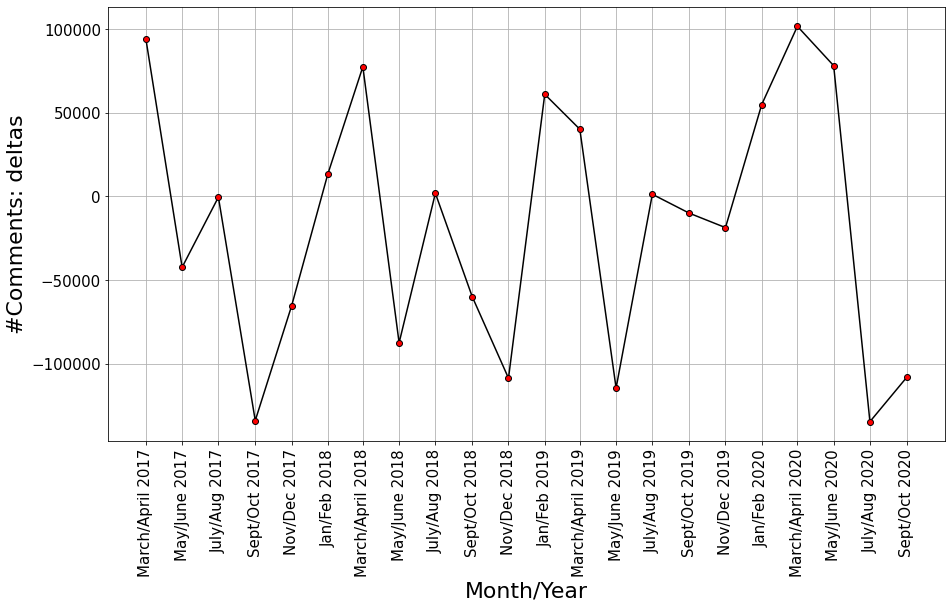

In [47]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_deltaclean['months'],bimonthly_yearly_deltaclean['count_delta'],'-o',color='black',markerfacecolor='r')
plt.xticks(bimonthly_yearly_deltaclean['months'], bi_ticks[1:],fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('#Comments: deltas',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()

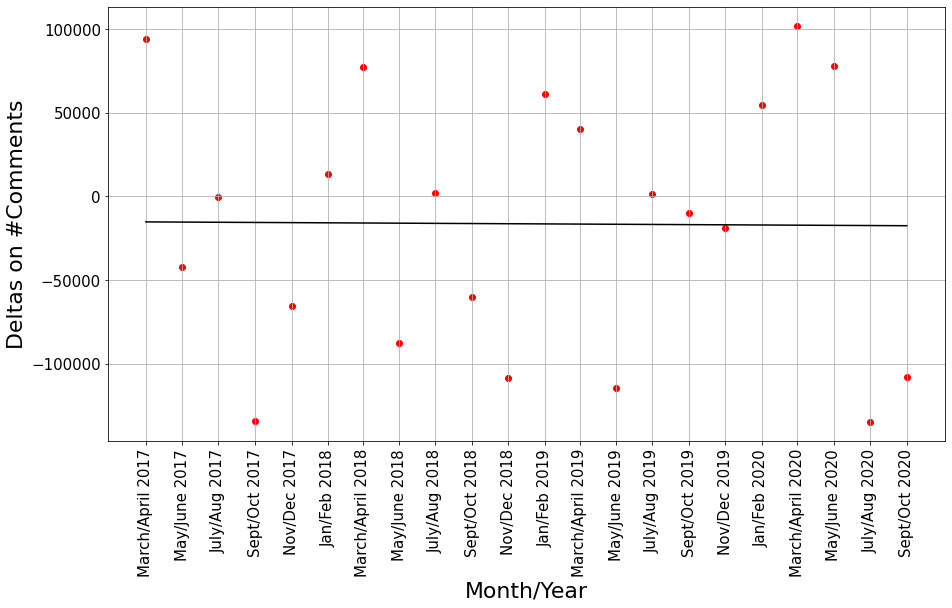

In [48]:
from sklearn import linear_model
x=np.array(pd.to_datetime(bimonthly_yearly_deltaclean['months'].index.values, format='%Y-%m-%d'), dtype=float)
x=x.reshape(-1, 1)
y=np.array(bimonthly_yearly_deltaclean['count_delta'], dtype=float)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)
predictions = lm.predict(x)

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(bimonthly_yearly_deltaclean['months'], predictions, 'k-')
plt.scatter(bimonthly_yearly_deltaclean['months'],bimonthly_yearly_deltaclean['count_delta'],color='red')
plt.xticks(bimonthly_yearly_deltaclean['months'], bi_ticks[1:],fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Deltas on #Comments',fontsize=22)
plt.xlabel('Month/Year',fontsize=22)
plt.grid()

In [49]:
bimonthly_yearly_deltaclean['count_delta'].mean()

-16415.863636363636

In [50]:
bimonthly_yearly_deltaclean['count_delta'].std()

76912.21976370543

In [51]:
bimonthly_yearly_deltaclean

,months,counts,count_delta
1,2017-03-01,1544675,94044.0
2,2017-05-01,1502328,-42347.0
3,2017-07-01,1501838,-490.0
4,2017-09-01,1367917,-133921.0
5,2017-11-01,1302294,-65623.0
6,2018-01-01,1315491,13197.0
7,2018-03-01,1392861,77370.0
8,2018-05-01,1305386,-87475.0
9,2018-07-01,1307223,1837.0
10,2018-09-01,1247296,-59927.0


In [52]:
# t, p = ttest_ind(2017, 2020, equal_var=False)

NameError: name 'ttest_ind' is not defined

In [53]:
data.head()

,RowId,CreateDate,PostId,Score,UserId,day_date,CreateYear,CreateMonth,CreateYearMonth
0,70028700,2017-01-01 00:00:36.010,41412408,0,7123245,2017-01-01,2017,1,2017-01-01
1,70028701,2017-01-01 00:00:24.143,41305580,0,218196,2017-01-01,2017,1,2017-01-01
2,70028706,2017-01-01 00:01:42.053,41412354,0,743464,2017-01-01,2017,1,2017-01-01
3,70028707,2017-01-01 00:01:51.007,11215592,2,1244126,2017-01-01,2017,1,2017-01-01
4,70028708,2017-01-01 00:01:56.537,41305580,0,218196,2017-01-01,2017,1,2017-01-01


In [54]:
data_2017=data[data["CreateYear"]==2017]
data_2017.head()
max(data_2017["CreateYear"])
len(data_2017)

8669683

In [55]:
data_2018=data[data["CreateYear"]==2018]
len(data_2018)

7706953

In [ ]:
data_2019=data[data["CreateYear"]==2019]
len(data_2019)

In [56]:
data_2020=data[data["CreateYear"]==2020]
len(data_2020)

6575989